In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# %matplotlib widget

In [3]:
IMAGE_WIDTH, IMAGE_HEIGHT = 4014, 3016
FOCAL_LENGTH_PX = 2850

IMAGE_WIDTH, IMAGE_HEIGHT, FOCAL_LENGTH_PX

(4014, 3016, 2850)

In [4]:
camera_intrinsics = np.array([
    [FOCAL_LENGTH_PX, 0, IMAGE_WIDTH / 2],
    [0, FOCAL_LENGTH_PX, IMAGE_HEIGHT / 2],
    [0, 0, 1]
])

camera_intrinsics

array([[2.850e+03, 0.000e+00, 2.007e+03],
       [0.000e+00, 2.850e+03, 1.508e+03],
       [0.000e+00, 0.000e+00, 1.000e+00]])

In [5]:
laser_position = np.array([-0.04, -0.11, 0])
laser_direction = np.array([0, 0, 1])

laser_position, laser_direction

(array([-0.04, -0.11,  0.  ]), array([0, 0, 1]))

In [6]:
t = np.linspace(0.5, 30, 1000)

t

array([ 0.5       ,  0.52952953,  0.55905906,  0.58858859,  0.61811812,
        0.64764765,  0.67717718,  0.70670671,  0.73623624,  0.76576577,
        0.7952953 ,  0.82482482,  0.85435435,  0.88388388,  0.91341341,
        0.94294294,  0.97247247,  1.002002  ,  1.03153153,  1.06106106,
        1.09059059,  1.12012012,  1.14964965,  1.17917918,  1.20870871,
        1.23823824,  1.26776777,  1.2972973 ,  1.32682683,  1.35635636,
        1.38588589,  1.41541542,  1.44494494,  1.47447447,  1.504004  ,
        1.53353353,  1.56306306,  1.59259259,  1.62212212,  1.65165165,
        1.68118118,  1.71071071,  1.74024024,  1.76976977,  1.7992993 ,
        1.82882883,  1.85835836,  1.88788789,  1.91741742,  1.94694695,
        1.97647648,  2.00600601,  2.03553554,  2.06506507,  2.09459459,
        2.12412412,  2.15365365,  2.18318318,  2.21271271,  2.24224224,
        2.27177177,  2.3013013 ,  2.33083083,  2.36036036,  2.38988989,
        2.41941942,  2.44894895,  2.47847848,  2.50800801,  2.53

In [7]:
p = laser_position[:, np.newaxis] + t[np.newaxis, :] * laser_direction[:, np.newaxis]

p.shape

(3, 1000)

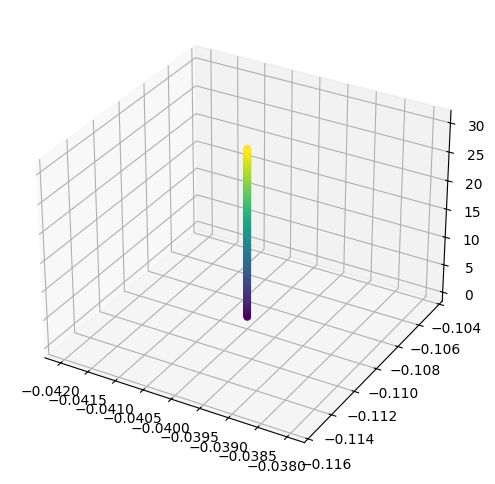

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[0, :], p[1, :], p[2, :], c=p[2, :], cmap='viridis', marker='o')
plt.show()

In [9]:
s = p / p[2, :]
s = camera_intrinsics @ s

s

array([[1.77900000e+03, 1.79171456e+03, 1.80308594e+03, ...,
        2.00319250e+03, 2.00319626e+03, 2.00320000e+03],
       [8.81000000e+02, 9.15965028e+02, 9.47236347e+02, ...,
        1.49752939e+03, 1.49753970e+03, 1.49755000e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]], shape=(3, 1000))

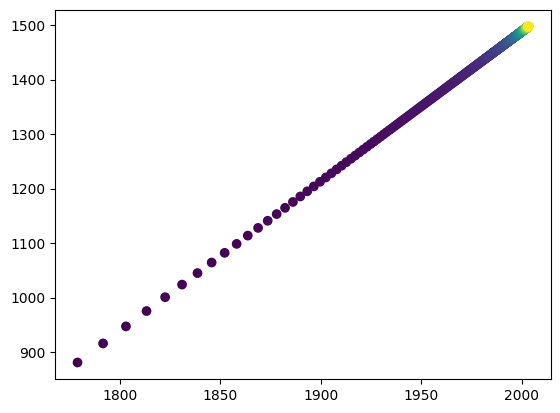

In [10]:
plt.scatter(s[0, :], s[1, :], c=p[2, :], cmap='viridis', marker='o')